# irisデータに無相関化と主成分分析

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## irisデータを確認

In [5]:
iris_data_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
iris_data_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data_df['target'] = iris.target_names[iris.target]

In [8]:
iris_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
iris_data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


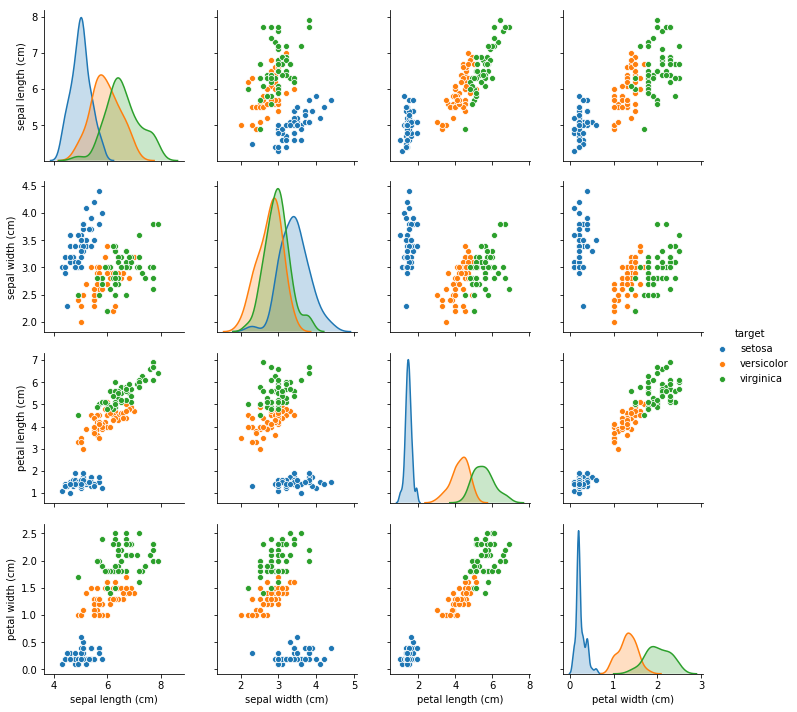

In [10]:
sns.pairplot(iris_data_df,hue='target')

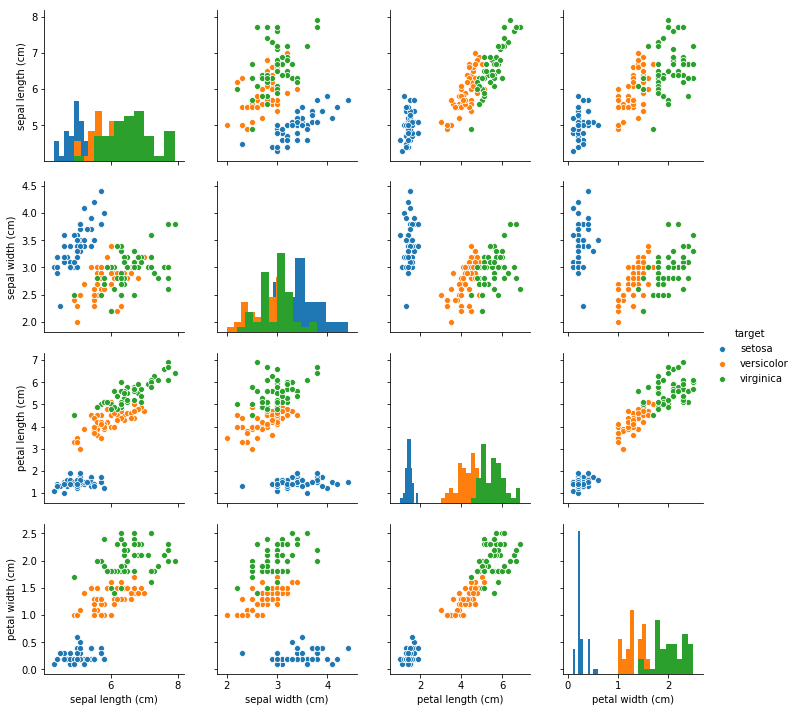

In [11]:
sns.pairplot(iris_data_df,hue='target',diag_kind='hist')

## irisデータ（花弁の長さと幅）を無相関化（スクラッチ）

In [12]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
X = iris.data[:,2:]

In [14]:
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [15]:
X.shape

(150, 2)

In [16]:
X.mean(axis=0)

array([3.758     , 1.19933333])

In [17]:
X.std(axis=0)

array([1.75940407, 0.75969263])

In [18]:
X.var(axis=0)

array([3.09550267, 0.57713289])

In [19]:
Sigma = np.cov(X, rowvar=0)

In [20]:
Sigma

array([[3.11627785, 1.2956094 ],
       [1.2956094 , 0.58100626]])

In [21]:
lamda, S = np.linalg.eig(Sigma)

In [22]:
lamda

array([3.66123805, 0.03604607])

In [23]:
S

array([[ 0.92177769, -0.38771882],
       [ 0.38771882,  0.92177769]])

In [24]:
S.T

array([[ 0.92177769,  0.38771882],
       [-0.38771882,  0.92177769]])

In [25]:
y = np.dot(S.T, X.T).T

In [26]:
y[:5]

array([[ 1.36803253, -0.35845081],
       [ 1.36803253, -0.35845081],
       [ 1.27585476, -0.31967893],
       [ 1.4602103 , -0.3972227 ],
       [ 1.36803253, -0.35845081]])

In [27]:
y_cov = np.cov(y, rowvar=0)

In [28]:
y_cov

array([[3.66123805e+00, 6.15629081e-16],
       [6.15629081e-16, 3.60460707e-02]])

In [29]:
np.dot(S,S.T)

array([[1., 0.],
       [0., 1.]])

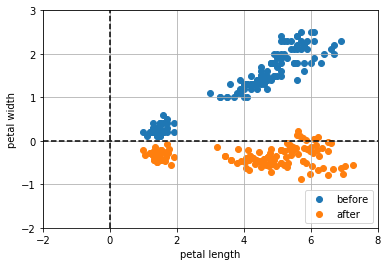

In [30]:
plt.scatter(X[:, 0], X[:, 1], label='before')
plt.scatter(y[:, 0], y[:, 1], label='after')

plt.ylim((-2, 3))
plt.xlim((-2, 8))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.plot([0, 0], [-2, 3], 'k--')
plt.plot([-2, 8], [0, 0], 'k--')
plt.grid(True)
plt.legend()
plt.show()

## irisデータ（花弁の長さと幅）を主成分分析（スクラッチ）

In [31]:
X_centerized = X - X.mean(axis=0)

In [32]:
X_centerized[:5]

array([[-2.358     , -0.99933333],
       [-2.358     , -0.99933333],
       [-2.458     , -0.99933333],
       [-2.258     , -0.99933333],
       [-2.358     , -0.99933333]])

In [33]:
Sigma = np.cov(X_centerized, rowvar=0)

In [34]:
Sigma

array([[3.11627785, 1.2956094 ],
       [1.2956094 , 0.58100626]])

In [35]:
lamda, S = np.linalg.eig(Sigma)

In [36]:
lamda

array([3.66123805, 0.03604607])

In [37]:
S

array([[ 0.92177769, -0.38771882],
       [ 0.38771882,  0.92177769]])

In [38]:
y = np.dot(S.T, X_centerized.T).T

In [39]:
y[:5]

array([[-2.56101214, -0.00692219],
       [-2.56101214, -0.00692219],
       [-2.65318991,  0.03184969],
       [-2.46883437, -0.04569407],
       [-2.56101214, -0.00692219]])

In [40]:
y_cov = np.cov(y, rowvar=0)

In [41]:
y_cov

array([[3.66123805e+00, 1.32815633e-15],
       [1.32815633e-15, 3.60460707e-02]])

In [42]:
np.dot(S,S.T)

array([[1., 0.],
       [0., 1.]])

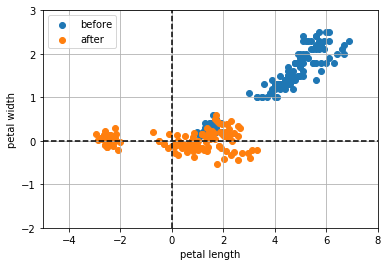

In [43]:
plt.scatter(X[:, 0], X[:, 1], label='before')
plt.scatter(y[:, 0], y[:, 1], label='after')

plt.ylim((-2, 3))
plt.xlim((-5, 8))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.plot([0, 0], [-2, 3], 'k--')
plt.plot([-5, 8], [0, 0], 'k--')
plt.grid(True)
plt.legend()
plt.show()

## irisデータ（花弁の長さと幅）を主成分分析（scikit-learn利用）

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA()

In [46]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
iris_data_pca = pca.transform(X)

In [48]:
iris_data_pca.shape

(150, 2)

In [49]:
iris_data_pca[:5]

array([[-2.56101214, -0.00692219],
       [-2.56101214, -0.00692219],
       [-2.65318991,  0.03184969],
       [-2.46883437, -0.04569407],
       [-2.56101214, -0.00692219]])

In [50]:
pca_cov = np.cov(iris_data_pca, rowvar=0)

In [51]:
pca_cov

array([[ 3.66123805e+00, -3.32135147e-16],
       [-3.32135147e-16,  3.60460707e-02]])

In [52]:
pca.components_

array([[ 0.92177769,  0.38771882],
       [-0.38771882,  0.92177769]])

In [53]:
pca.components_.shape

(2, 2)

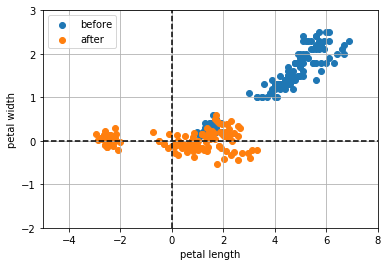

In [54]:
plt.scatter(X[:, 0], X[:, 1], label='before')
plt.scatter(iris_data_pca[:, 0], iris_data_pca[:, 1], label='after')

plt.ylim((-2, 3))
plt.xlim((-5, 8))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.plot([0, 0], [-2, 3], 'k--')
plt.plot([-5, 8], [0, 0], 'k--')
plt.grid(True)
plt.legend()
plt.show()